In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Ejercicio 1: datos linearmente separables, Perceptron vs SVM

In [4]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/andSVM_2.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
dataNl.describe()

,X1,X2,y
count,7.000000,7.000000,7.000000
mean,1.000000,0.857143,0.428571
std,1.154701,1.345185,0.534522
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.500000,1.500000,1.000000
max,3.000000,3.000000,1.000000


#### Perceptron

Exactitud:  100.0 %


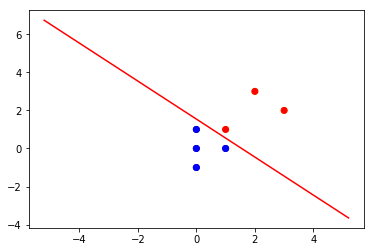

In [40]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"]).reshape(7,1)

#Declaración de variables:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

#Operaciones, grafo:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(5000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Exactitud: ",sess.run(accuracy, feed_dict={x: X, y_: Y})*100,"%") # las corremos

#Visualizar la partición del espacio:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
m=((w[0]/w[2]))/((-w[0]/w[1]))
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.show()

#Cerrar sesión:
sess.close()

#### SVM  c=1 

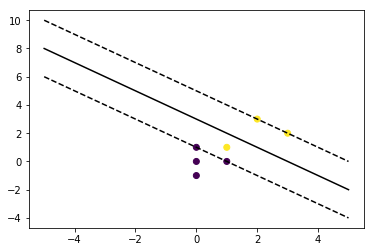

Error cuadrado medio: 14.2857142857 %


In [53]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"])

clf = SVC(C=1.0, kernel="linear")
clf.fit(X, Y)



w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0],X[:,1],c=Y)

plt.show()
e = np.mean((clf.predict(X)-Y)**2)*100
print("Error cuadrado medio:",e,"%")

#### SVM  c=100

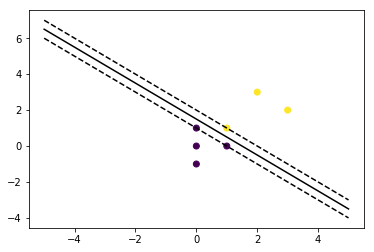

Error cuadrado medio: 0.0 %


In [54]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"])

clf = SVC(C=100.0, kernel="linear")
clf.fit(X, Y)



w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0],X[:,1],c=Y)

plt.show()
e = np.mean((clf.predict(X)-Y)**2)*100
print("Error cuadrado medio:",e,"%")

#### Error al variar el valor de c

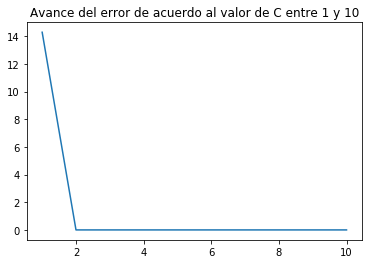

In [62]:
#Datos:
X=np.asarray([dataNl["X1"],dataNl["X2"]]).T
Y=np.asarray(dataNl["y"])
n = 10
e = np.zeros(n)
for i in range(1,n):
    clf = SVC(C=i, kernel="linear")
    clf.fit(X, Y)
    e[i-1] = np.mean((clf.predict(X)-Y)**2)*100
    
plt.plot(range(1,n+1),e)
plt.title("Avance del error de acuerdo al valor de C entre 1 y 10")
plt.show()

### Ejercicio 2: datos NO linearmente separables, Neural Netvs SVM

In [4]:
#Datos:
npuntos = 50
mu = 0
var = 1
X = np.random.normal(mu, var, [npuntos,2])
Y = 1.0*np.array(X[:,0]**2 + X[:,1]**2 < var**2).reshape(npuntos,1)
#print(X)
#print(Y)

#### Neural Net

===========================Capa oculta 4  neuronas===========================
Exactitud:  100.0 %


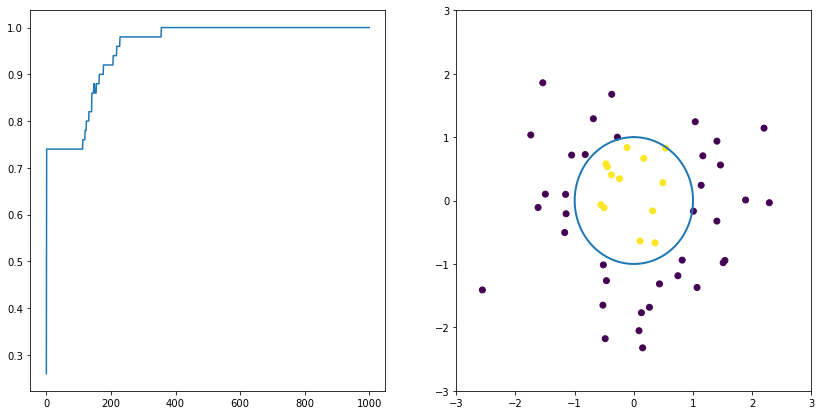

In [5]:
#Declaración de variables:
input_size=2
hiden_size=4
output_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_size]) #la y real

#La variables para lo que se va a ir calculando y modificando en el camino
weights = {
    'w_h': tf.Variable(tf.random_uniform([input_size, hiden_size], -1, 1)),
    'w_out': tf.Variable(tf.random_uniform([hiden_size, output_size], -1, 1))
}
biases = {
    'b_h': tf.Variable(tf.zeros([hiden_size])),
    'b_out': tf.Variable(tf.zeros([output_size]))
}

#Modelo, grafo:
# Capa oculta completamente conectada:
hlayer = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['w_h']), biases['b_h']))
# Salida completamente conectada (una salida)
y = tf.nn.sigmoid(tf.matmul(hlayer, weights['w_out']) + biases['b_out'])
#Funcion de pérdida
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#Optimizador
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva
#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operaciones
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(init)
n = 1000
acc = np.zeros(n)
for i in range(n):
    aux, acc[i] = sess.run([train_step,accuracy], feed_dict={x: X, y_: Y})
    #acc[i] = sess.run(accuracy, feed_dict={x: X, y_: Y})

print("===========================Capa oculta",hiden_size," neuronas===========================")
accG = sess.run(accuracy, feed_dict={x: X, y_: Y})*100
print("Exactitud: ",accG,"%") # las corremos

#Progreso de la exactitud:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(range(n), acc)


#Visualizar la partición del espacio:
bs=[sess.run(biases["b_h"], feed_dict={x: X, y_: Y})][0]
ws=[sess.run(weights["w_h"], feed_dict={x: X, y_: Y})][0]

plt.subplot(1,2,2)

ng=100
x2 = np.linspace(-2*var,2*var,ng)
Y2 = sess.run(tf.round(y), feed_dict={x: X, y_: Y})
plt.scatter(X[:,0],X[:,1],c=Y2)
#rectas = np.zeros((hiden_size,ng))
#for i in range(0,hiden_size):
#    rectas[i] = -bs[i]/ws[1,i]-ws[0,i]*x2/ws[1,i]
#    plt.plot(x2,rectas[i],color='red')

#Circulo:
xC = np.linspace(0,2*3.1415,ng) # 100 numeros espaciados
plt.plot(var*np.sin(xC),var*np.cos(xC), linewidth=2)


plt.xlim(-3*var,3*var)
plt.ylim(-3*var,3*var)
plt.show()

#### SVM

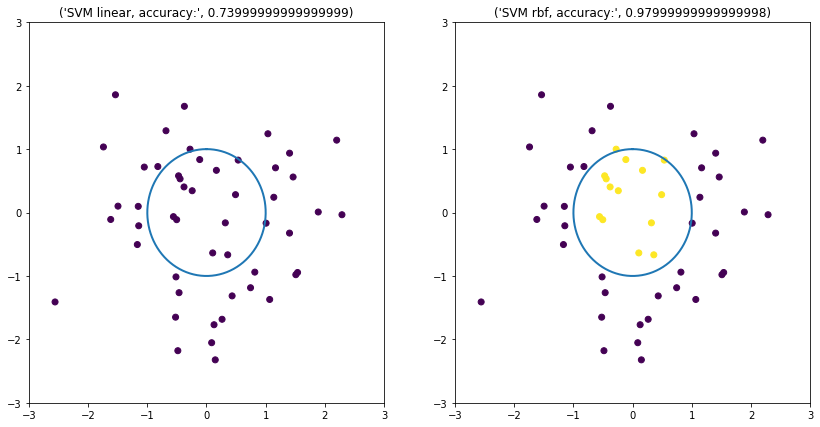

In [62]:
plt.figure(figsize=(14,7))

clf = SVC(C=1.0, kernel="linear")
clf.fit(X, Y.ravel())
#Circulo:
plt.subplot(1,2,1)
plt.plot(var*np.sin(xC),var*np.cos(xC), linewidth=2)
ypred = clf.predict(X)
plt.scatter(X[:,0],X[:,1],c=ypred)
acc = np.mean(ypred==Y.T)
plt.xlim(-3*var,3*var)
plt.ylim(-3*var,3*var)
cad = "SVM linear, accuracy:",acc
plt.title(cad)


clf = SVC(C=1.0, kernel="rbf")
clf.fit(X, Y.ravel())
#Circulo:
plt.subplot(1,2,2)
plt.plot(var*np.sin(xC),var*np.cos(xC), linewidth=2)
ypred = clf.predict(X)
plt.scatter(X[:,0],X[:,1],c=ypred)
acc = np.mean(ypred==Y.T)
plt.xlim(-3*var,3*var)
plt.ylim(-3*var,3*var)
cad = "SVM rbf, accuracy:",acc
plt.title(cad)
plt.show()

#### Comparación

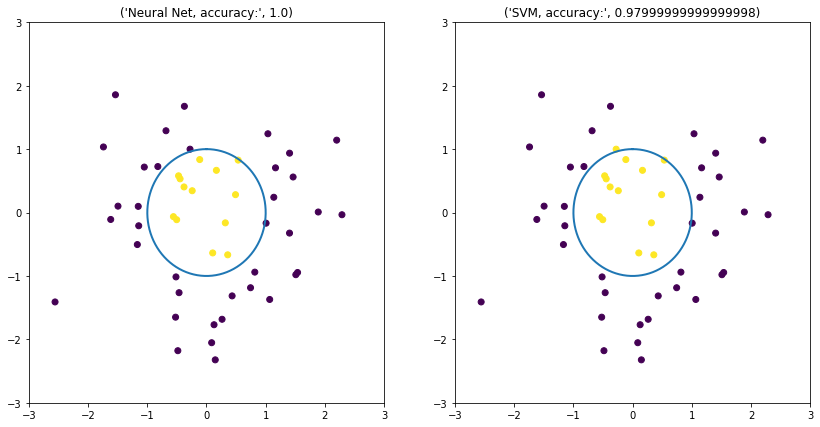

In [60]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
ng=100
x2 = np.linspace(-2*var,2*var,ng)
Y2 = sess.run(tf.round(y), feed_dict={x: X, y_: Y})
plt.scatter(X[:,0],X[:,1],c=Y2)
#Circulo:
xC = np.linspace(0,2*3.1415,ng) # 100 numeros espaciados
plt.plot(var*np.sin(xC),var*np.cos(xC), linewidth=2)
plt.xlim(-3*var,3*var)
plt.ylim(-3*var,3*var)
cad = "Neural Net, accuracy:", (accG/100)
plt.title(cad)
#===================================
#Circulo:
plt.subplot(1,2,2)
plt.plot(var*np.sin(xC),var*np.cos(xC), linewidth=2)
ypred = clf.predict(X)
plt.scatter(X[:,0],X[:,1],c=ypred)
acc = np.mean(ypred==Y.T)
plt.xlim(-3*var,3*var)
plt.ylim(-3*var,3*var)
cad = "SVM, accuracy:",acc
plt.title(cad)
plt.show()